In [1]:
import pandas as pd
data = pd.read_csv('CryptocurrencyData.csv')
data.head()

,Rank,Coin Name,Symbol,Price,1h,24h,7d,30d,24h Volume,Circulating Supply,Total Supply,Market Cap
0,1,Bitcoin,BTC,"36,456.94",0.40%,-1.70%,1.00%,18.40%,"$22,801,222,945.00","19,549,806",21 Million,"$712,726,163,003.00"
1,2,Ethereum,ETH,"2,027.60",0.50%,1.40%,1.00%,20.70%,"$26,845,710,464.00","120,249,015",120 Million,"$243,488,187,281.00"
2,3,Tether,USDT,1.00,0.10%,-0.30%,-0.10%,-0.10%,"$47,122,466,339.00","88,308,652,879",88.3 Billion,"$88,027,617,310.00"
3,4,BNB,BNB,231.63,-0.10%,-12.60%,-8.00%,5.40%,"$3,715,265,116.00","153,856,150",154 Million,"$35,716,332,862.00"
4,5,XRP,XRP,0.59,0.10%,-1.90%,-6.90%,12.10%,"$1,339,890,506.00","53,718,306,475",100 Billion,"$31,863,926,051.00"


In [2]:
# Data Cleaning
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Rank                4150 non-null   int64 
 1   Coin Name           4150 non-null   object
 2   Symbol              4150 non-null   object
 3    Price              4150 non-null   object
 4   1h                  4055 non-null   object
 5   24h                 4150 non-null   object
 6   7d                  4148 non-null   object
 7   30d                 4093 non-null   object
 8    24h Volume         4150 non-null   object
 9   Circulating Supply  4150 non-null   object
 10  Total Supply        4150 non-null   object
 11   Market Cap         4150 non-null   object
dtypes: int64(1), object(11)
memory usage: 389.2+ KB


In [3]:
data.columns = data.columns.str.strip()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Rank                4150 non-null   int64 
 1   Coin Name           4150 non-null   object
 2   Symbol              4150 non-null   object
 3   Price               4150 non-null   object
 4   1h                  4055 non-null   object
 5   24h                 4150 non-null   object
 6   7d                  4148 non-null   object
 7   30d                 4093 non-null   object
 8   24h Volume          4150 non-null   object
 9   Circulating Supply  4150 non-null   object
 10  Total Supply        4150 non-null   object
 11  Market Cap          4150 non-null   object
dtypes: int64(1), object(11)
memory usage: 389.2+ KB


In [5]:
df = data.copy()

In [6]:
df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=False)
df['Price'] = df['Price'].str.replace(',', '', regex=False)
df['Price']  = pd.to_numeric(df['Price'], errors='coerce')

In [7]:
percentage_cols = ['1h', '24h', '7d', '30d']
for col in percentage_cols:
    df[col] = df[col].astype(str).str.replace('%', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
df['24h Volume'] = df['24h Volume'].astype(str).str.replace('$', '', regex=False)
df['24h Volume'] = df['24h Volume'].str.replace(',', '', regex=False)
df['24h Volume'] = pd.to_numeric(df['24h Volume'], errors='coerce')

In [9]:
df['Circulating Supply'] = df['Circulating Supply'].astype(str).str.replace(',', '', regex=False)
df['Circulating Supply'] = pd.to_numeric(df['Circulating Supply'], errors='coerce')

In [10]:
# Clean Total Supply - handle 'Million' and 'Billion' text
import numpy as np
def convert_supply(value):
    if pd.isna(value) or value == 'nan':
        return np.nan
    value = str(value).strip()
    # Remove commas
    value = value.replace(',', '')

    # Handle Million
    if 'Million' in value:
        number = float(value.replace('Million', '').strip())
        return number * 1_000_000
    # Handle Billion
    elif 'Billion' in value:
        number = float(value.replace('Billion', '').strip())
        return number * 1_000_000_000
    else:
        try:
            return float(value)
        except:
            return np.nan

df['Total Supply'] = df['Total Supply'].apply(convert_supply)

In [11]:
# Clean Market Cap - remove $ and commas, convert to float
df['Market Cap'] = df['Market Cap'].astype(str).str.replace('$', '', regex=False)
df['Market Cap'] = df['Market Cap'].str.replace(',', '', regex=False)
df['Market Cap'] = pd.to_numeric(df['Market Cap'], errors='coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                4150 non-null   int64  
 1   Coin Name           4150 non-null   object 
 2   Symbol              4150 non-null   object 
 3   Price               2424 non-null   float64
 4   1h                  3603 non-null   float64
 5   24h                 3698 non-null   float64
 6   7d                  3696 non-null   float64
 7   30d                 3641 non-null   float64
 8   24h Volume          3666 non-null   float64
 9   Circulating Supply  4150 non-null   float64
 10  Total Supply        3655 non-null   float64
 11  Market Cap          3740 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 389.2+ KB


In [13]:
df.head()

,Rank,Coin Name,Symbol,Price,1h,24h,7d,30d,24h Volume,Circulating Supply,Total Supply,Market Cap
0,1,Bitcoin,BTC,36456.94,0.4,-1.7,1.0,18.4,2.280122e+10,1.954981e+07,2.100000e+07,7.127262e+11
1,2,Ethereum,ETH,2027.60,0.5,1.4,1.0,20.7,2.684571e+10,1.202490e+08,1.200000e+08,2.434882e+11
2,3,Tether,USDT,1.00,0.1,-0.3,-0.1,-0.1,4.712247e+10,8.830865e+10,8.830000e+10,8.802762e+10
3,4,BNB,BNB,231.63,-0.1,-12.6,-8.0,5.4,3.715265e+09,1.538562e+08,1.540000e+08,3.571633e+10
4,5,XRP,XRP,0.59,0.1,-1.9,-6.9,12.1,1.339891e+09,5.371831e+10,1.000000e+11,3.186393e+10


In [14]:
#Find the top 10 cryptocurrencies by market cap
 
top_10_coins_market_cap = df.nlargest(10, 'Market Cap')

top_10_coins_market_cap = top_10_coins_market_cap.set_index('Rank')

print(top_10_coins_market_cap[['Coin Name', 'Market Cap']])


              Coin Name    Market Cap
Rank                                 
1               Bitcoin  7.127262e+11
2              Ethereum  2.434882e+11
3                Tether  8.802762e+10
4                   BNB  3.571633e+10
5                   XRP  3.186393e+10
6                  USDC  2.412008e+10
7                Solana  2.325809e+10
8     Lido Staked Ether  1.843532e+10
9               Cardano  1.290396e+10
10             Dogecoin  1.053291e+10


In [15]:
#Calculate which coins have the highest 7-day growth
top1_7d_growth = df.nlargest(1, '7d')

top1_7d_growth = top1_7d_growth.set_index('Rank')

print(top1_7d_growth[['Coin Name', '7d']])

             Coin Name      7d
Rank                          
4044  NewYork Exchange  5833.5


In [16]:
#Find which of the coins have the highest trading volume relative to their market cap

df['Volume/MarketCap'] = (df['24h Volume'] / df['Market Cap'])
df.head()

,Rank,Coin Name,Symbol,Price,1h,24h,7d,30d,24h Volume,Circulating Supply,Total Supply,Market Cap,Volume/MarketCap
0,1,Bitcoin,BTC,36456.94,0.4,-1.7,1.0,18.4,2.280122e+10,1.954981e+07,2.100000e+07,7.127262e+11,0.031992
1,2,Ethereum,ETH,2027.60,0.5,1.4,1.0,20.7,2.684571e+10,1.202490e+08,1.200000e+08,2.434882e+11,0.110255
2,3,Tether,USDT,1.00,0.1,-0.3,-0.1,-0.1,4.712247e+10,8.830865e+10,8.830000e+10,8.802762e+10,0.535315
3,4,BNB,BNB,231.63,-0.1,-12.6,-8.0,5.4,3.715265e+09,1.538562e+08,1.540000e+08,3.571633e+10,0.104021
4,5,XRP,XRP,0.59,0.1,-1.9,-6.9,12.1,1.339891e+09,5.371831e+10,1.000000e+11,3.186393e+10,0.042050


In [17]:
Highest_ratio = df.nlargest(10, 'Volume/MarketCap')

Highest_ratio = Highest_ratio.set_index('Rank')

print(Highest_ratio[['Coin Name', 'Volume/MarketCap']])

                       Coin Name  Volume/MarketCap
Rank                                              
3736                      Artery      27307.327586
3097           Structure Finance        163.387009
3735                   Equalizer         82.534776
3658                    BabySwap         54.175611
2957               MrWeb Finance         37.537133
3733  WolfSafePoorPeople Polygon         32.029178
3704               Fire Protocol         16.467832
2075                 TOP Network         15.902927
1443                        Silk         11.992913
1075                    Delysium          9.569520


In [18]:
#Identify the most volatile coins (based on 24h and 7d changes)
print(df['24h'].min())
print(df['24h'].max())
print(df['7d'].min())
print(df['7d'].max())

-90.9
500.8
-97.0
5833.5


In [19]:
# average of both 24h and 7d
df['avg_24_7d'] = (abs(df['24h']) + abs(df['7d'])) / 2
df.head(10)


,Rank,Coin Name,Symbol,Price,1h,24h,7d,30d,24h Volume,Circulating Supply,Total Supply,Market Cap,Volume/MarketCap,avg_24_7d
0,1,Bitcoin,BTC,36456.94,0.4,-1.7,1.0,18.4,2.280122e+10,1.954981e+07,2.100000e+07,7.127262e+11,0.031992,1.35
1,2,Ethereum,ETH,2027.60,0.5,1.4,1.0,20.7,2.684571e+10,1.202490e+08,1.200000e+08,2.434882e+11,0.110255,1.20
2,3,Tether,USDT,1.00,0.1,-0.3,-0.1,-0.1,4.712247e+10,8.830865e+10,8.830000e+10,8.802762e+10,0.535315,0.20
3,4,BNB,BNB,231.63,-0.1,-12.6,-8.0,5.4,3.715265e+09,1.538562e+08,1.540000e+08,3.571633e+10,0.104021,10.30
4,5,XRP,XRP,0.59,0.1,-1.9,-6.9,12.1,1.339891e+09,5.371831e+10,1.000000e+11,3.186393e+10,0.042050,4.40
5,6,USDC,USDC,1.00,0.0,-0.4,0.0,0.0,1.645824e+10,2.426459e+10,2.430000e+10,2.412008e+10,0.682346,0.20
6,7,Solana,SOL,54.97,0.6,-0.6,-11.4,87.9,2.374980e+09,4.231043e+08,5.630000e+08,2.325809e+10,0.102114,6.00
7,8,Lido Staked Ether,STETH,2023.81,0.4,1.5,0.9,20.7,1.762554e+07,9.107771e+06,9.110000e+06,1.843532e+10,0.000956,1.20
8,9,Cardano,ADA,0.37,0.1,-1.6,0.7,40.1,3.732770e+08,3.496474e+10,4.500000e+10,1.290396e+10,0.028927,1.15
9,10,Dogecoin,DOGE,0.07,0.1,-2.3,0.1,14.9,9.572257e+08,1.419356e+11,1.420000e+11,1.053291e+10,0.090879,1.20


In [20]:
Highest_volatile_coins = df.nlargest(10, 'avg_24_7d')

Highest_volatile_coins = Highest_volatile_coins.set_index('Rank')

print(Highest_volatile_coins[['Coin Name', 'avg_24_7d']])

                      Coin Name  avg_24_7d
Rank                                      
4044           NewYork Exchange    2916.95
4010  MillenniumClub Coin [OLD]     993.05
2483                   Reaction     371.00
3927                     01coin     366.90
2334                 Stohn Coin     356.90
3794                     Innova     320.20
3604                   Pinkcoin     294.40
844                      Xpense     269.25
2309                  Equilibre     255.75
3857                     Niobio     246.85


Text(0.5, 1.0, 'Top 10 Cryptocurrencies by Market Cap')

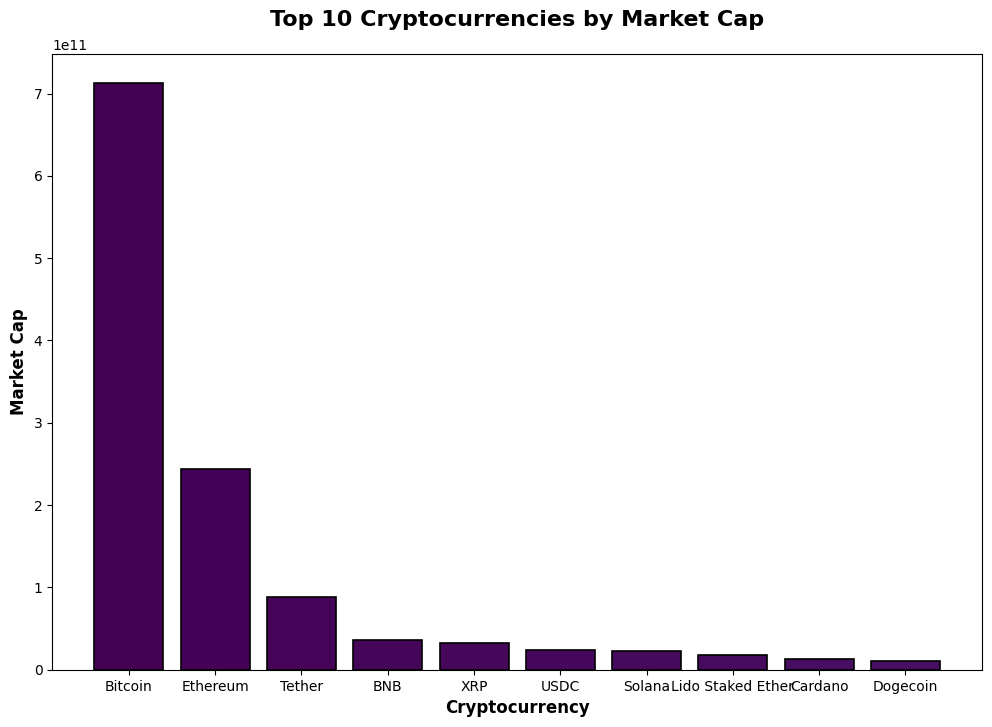

In [21]:
#Bar chart of top 10 by market cap
import matplotlib.pyplot as plt

top10_marketcap = df.sort_values(by='Market Cap', ascending=False).head(10)
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(range(len(top10_marketcap)))
bars = plt.bar(top10_marketcap['Coin Name'], 
               top10_marketcap['Market Cap'], 
               color=colors,
               edgecolor='black',
               linewidth=1.2)
plt.xlabel('Cryptocurrency', fontsize=12, fontweight='bold')
plt.ylabel('Market Cap', fontsize=12, fontweight='bold')
plt.title('Top 10 Cryptocurrencies by Market Cap', fontsize=16, fontweight='bold', pad=20)


Text(0.5, 1.0, 'Cryptocurrency Market Cap vs Price (Log-Log Scale)\n(Color indicates 24h % change)')

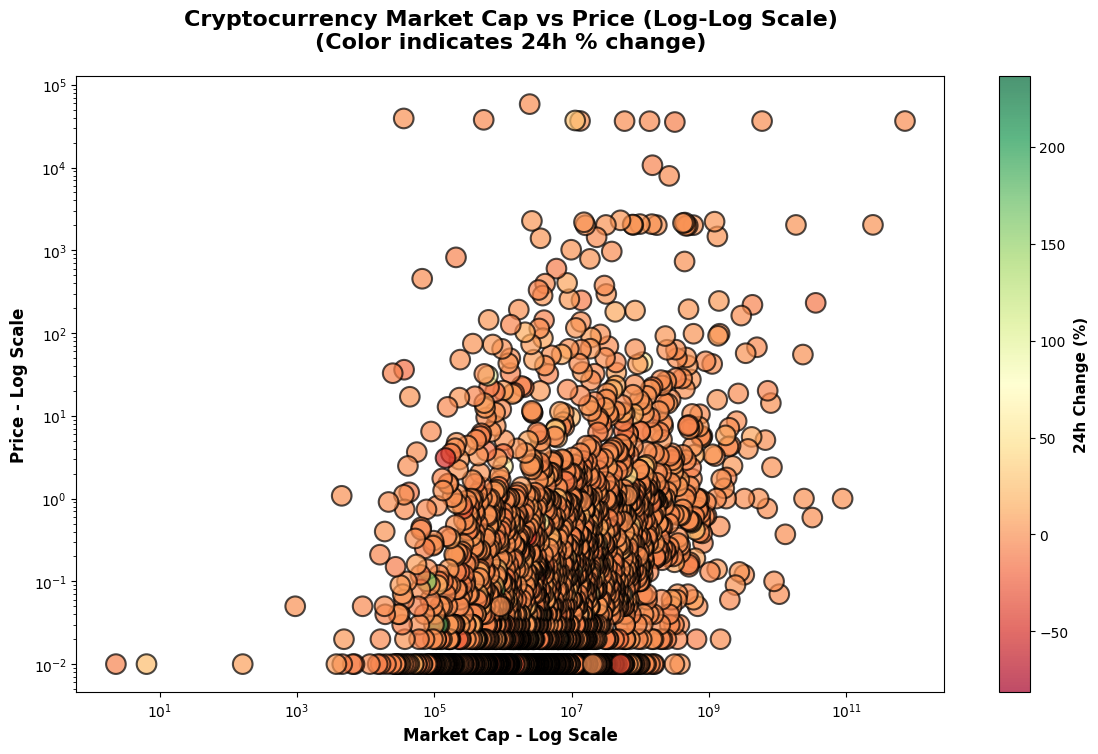

In [22]:
#Scatter plot of market cap vs price
plt.figure(figsize=(14, 8))
scatter = plt.scatter(df['Market Cap'], 
                      df['Price'],
                      s=200,
                      c=df['24h'],
                      cmap='RdYlGn',
                      alpha=0.7,
                      edgecolors='black',
                      linewidth=1.5)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('24h Change (%)', fontsize=11, fontweight='bold')

# Set log scale for both axes
plt.xscale('log')
plt.yscale('log')

# Customize the chart
plt.xlabel('Market Cap - Log Scale', fontsize=12, fontweight='bold')
plt.ylabel('Price - Log Scale', fontsize=12, fontweight='bold')
plt.title('Cryptocurrency Market Cap vs Price (Log-Log Scale)\n(Color indicates 24h % change)', 
          fontsize=16, fontweight='bold', pad=20)

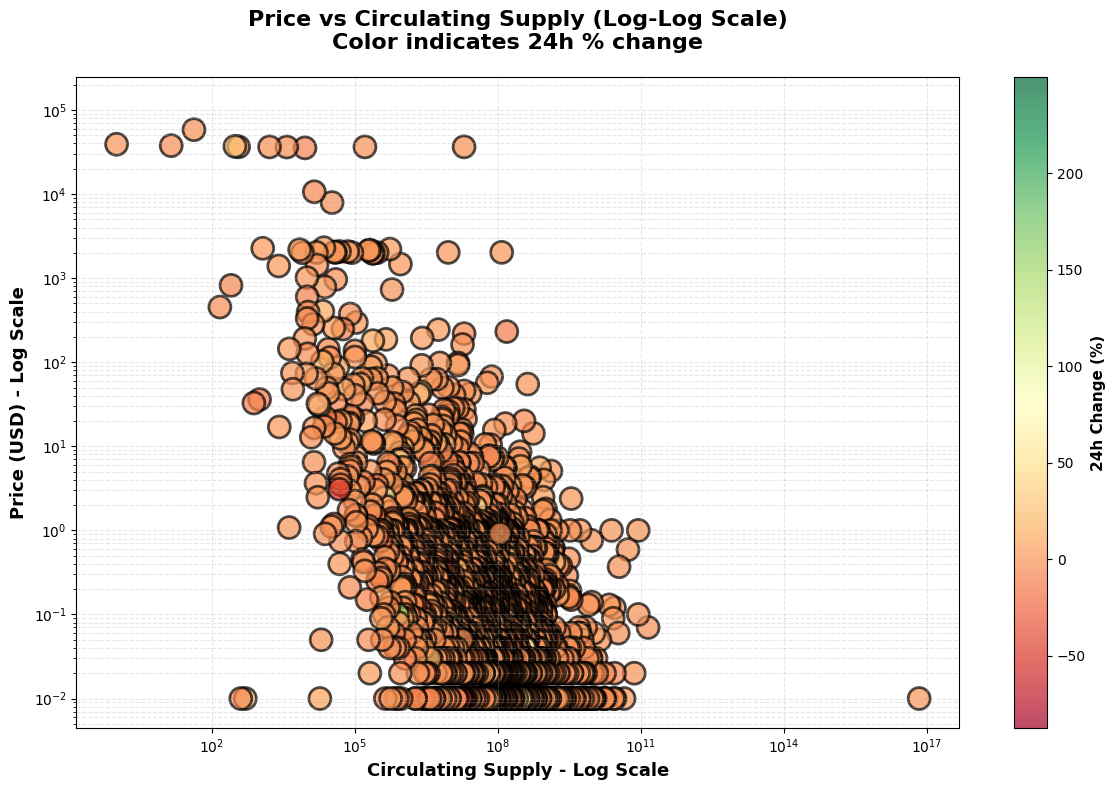

In [23]:

# Scatter Plot: Prices vs Circulating Supply

plt.figure(figsize=(12, 8))

scatter_ind1 = plt.scatter(df['Circulating Supply'], 
                           df['Price'],
                           s=250,
                           c=df['24h'],
                           cmap='RdYlGn',
                           alpha=0.7,
                           edgecolors='black',
                           linewidth=2)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Circulating Supply - Log Scale', fontsize=13, fontweight='bold')
plt.ylabel('Price (USD) - Log Scale', fontsize=13, fontweight='bold')
plt.title('Price vs Circulating Supply (Log-Log Scale)\nColor indicates 24h % change', 
          fontsize=16, fontweight='bold', pad=20)

plt.grid(True, alpha=0.3, linestyle='--', which='both')

# for idx, row in df.iterrows():
#     plt.annotate(row['Symbol'], 
#                 (row['Circulating Supply'], row['Price']),
#                 xytext=(7, 7),
#                 textcoords='offset points',
#                 fontsize=10,
#                 fontweight='bold',
#                 bbox=dict(boxstyle='round,pad=0.4', facecolor='yellow', alpha=0.6))

cbar_ind1 = plt.colorbar(scatter_ind1)
cbar_ind1.set_label('24h Change (%)', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

In [24]:

import pandas as pd

# Assuming df_cleaned is your cleaned dataframe
# df_cleaned = clean_crypto_data(df)

# Sort dataframe by 24h Volume in descending order (highest to lowest)
df_sorted_by_volume = df.sort_values(by='24h Volume', ascending=False)

# Reset index to get clean numbering from 0
df_sorted_by_volume = df_sorted_by_volume.reset_index(drop=True)
df_sorted_by_volume = pd.DataFrame(df_sorted_by_volume)
df_sorted_by_volume.head(10)

,Rank,Coin Name,Symbol,Price,1h,24h,7d,30d,24h Volume,Circulating Supply,Total Supply,Market Cap,Volume/MarketCap,avg_24_7d
0,3,Tether,USDT,1.00,0.1,-0.3,-0.1,-0.1,4.712247e+10,8.830865e+10,8.830000e+10,8.802762e+10,0.535315,0.20
1,2,Ethereum,ETH,2027.60,0.5,1.4,1.0,20.7,2.684571e+10,1.202490e+08,1.200000e+08,2.434882e+11,0.110255,1.20
2,1,Bitcoin,BTC,36456.94,0.4,-1.7,1.0,18.4,2.280122e+10,1.954981e+07,2.100000e+07,7.127262e+11,0.031992,1.35
3,6,USDC,USDC,1.00,0.0,-0.4,0.0,0.0,1.645824e+10,2.426459e+10,2.430000e+10,2.412008e+10,0.682346,0.20
4,38,BUSD,BUSD,1.00,0.4,-1.1,-0.3,-0.2,4.614207e+09,1.772659e+09,1.760000e+09,1.776603e+09,2.597208,0.70
5,4,BNB,BNB,231.63,-0.1,-12.6,-8.0,5.4,3.715265e+09,1.538562e+08,1.540000e+08,3.571633e+10,0.104021,10.30
6,7,Solana,SOL,54.97,0.6,-0.6,-11.4,87.9,2.374980e+09,4.231043e+08,5.630000e+08,2.325809e+10,0.102114,6.00
7,3845,WETH,WETH,2027.43,0.2,2.1,0.9,21.2,2.110024e+09,0.000000e+00,3.060000e+06,NaN,NaN,1.50
8,5,XRP,XRP,0.59,0.1,-1.9,-6.9,12.1,1.339891e+09,5.371831e+10,1.000000e+11,3.186393e+10,0.042050,4.40
9,14,Avalanche,AVAX,20.08,0.5,-6.5,2.9,100.9,1.061106e+09,3.556368e+08,4.330000e+08,7.141343e+09,0.148586,4.70


suggest five cryptocurrencies that might be good investments

1. Tether
2. Ethereum
3. Bitcoin
4. USDC
5. BUSD

I considered 24h Volume, average 24/7-day Volatility, Market Cap, and Circulating Supply. Among these, 24h Volume and Volatility are the most significant factors, as 24h Volume reflects an asset's trading activity and market interest, while Volatility indicates the level of stability and reliability of the coin under different market conditions. 

** Here I do not consider Price, because a single Bitcoin is too expensive for many people to buy**

What patterns did you notice in the data?

Bitcoin continues to lead the cryptocurrency market, followed by Ethereum, although the gap between the two remains substantial. The prices of coins are strongly correlated with both market capitalization and circulating supply. Price shows a positive correlation with market capitalization, while in the case of circulating supply, the law of demand and supply applies — as supply increases, price tends to decrease. Generally, price volatility is lower when prices are relatively low, which often corresponds to coins with a higher circulating supply.  

Which metrics did you prioritize and why?

1. Market Cap - Shows true market value, not manipulated by supply
2. 24h Volume - shows trading activity and market interest

What additional data would help make better predictions?

we have a bunch of missing records here. if we have those data, it would give better prediction.


In [26]:
#Problem 2:

In [27]:
df2 = df_sorted_by_volume[['Coin Name', 'Price', '24h', '7d', '24h Volume', 
                   'Market Cap', 'Volume/MarketCap', 'avg_24_7d']]
df2.head()

,Coin Name,Price,24h,7d,24h Volume,Market Cap,Volume/MarketCap,avg_24_7d
0,Tether,1.00,-0.3,-0.1,4.712247e+10,8.802762e+10,0.535315,0.20
1,Ethereum,2027.60,1.4,1.0,2.684571e+10,2.434882e+11,0.110255,1.20
2,Bitcoin,36456.94,-1.7,1.0,2.280122e+10,7.127262e+11,0.031992,1.35
3,USDC,1.00,-0.4,0.0,1.645824e+10,2.412008e+10,0.682346,0.20
4,BUSD,1.00,-1.1,-0.3,4.614207e+09,1.776603e+09,2.597208,0.70


In [30]:
df2.rename(columns={'24h': 'chg_24h', '7d': 'chg_7d','avg_24_7d':'volatility'}, inplace=True)

C:\Users\ajomo\AppData\Local\Temp\ipykernel_22708\2266901841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={'24h': 'chg_24h', '7d': 'chg_7d','avg_24_7d':'volatility'}, inplace=True)


In [31]:
df2['Target'] = (df2['chg_24h'] > 0).astype(int)
df2.head()

C:\Users\ajomo\AppData\Local\Temp\ipykernel_22708\129262598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Target'] = (df2['chg_24h'] > 0).astype(int)


,Coin Name,Price,chg_24h,chg_7d,24h Volume,Market Cap,Volume/MarketCap,volatility,Target
0,Tether,1.00,-0.3,-0.1,4.712247e+10,8.802762e+10,0.535315,0.20,0
1,Ethereum,2027.60,1.4,1.0,2.684571e+10,2.434882e+11,0.110255,1.20,1
2,Bitcoin,36456.94,-1.7,1.0,2.280122e+10,7.127262e+11,0.031992,1.35,0
3,USDC,1.00,-0.4,0.0,1.645824e+10,2.412008e+10,0.682346,0.20,0
4,BUSD,1.00,-1.1,-0.3,4.614207e+09,1.776603e+09,2.597208,0.70,0


In [32]:
df2['avg_change'] = (df2['chg_24h'] + df2['chg_7d']) / 2 
df2.head()

C:\Users\ajomo\AppData\Local\Temp\ipykernel_22708\3302638817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['avg_change'] = (df2['chg_24h'] + df2['chg_7d']) / 2


,Coin Name,Price,chg_24h,chg_7d,24h Volume,Market Cap,Volume/MarketCap,volatility,Target,avg_change
0,Tether,1.00,-0.3,-0.1,4.712247e+10,8.802762e+10,0.535315,0.20,0,-0.20
1,Ethereum,2027.60,1.4,1.0,2.684571e+10,2.434882e+11,0.110255,1.20,1,1.20
2,Bitcoin,36456.94,-1.7,1.0,2.280122e+10,7.127262e+11,0.031992,1.35,0,-0.35
3,USDC,1.00,-0.4,0.0,1.645824e+10,2.412008e+10,0.682346,0.20,0,-0.20
4,BUSD,1.00,-1.1,-0.3,4.614207e+09,1.776603e+09,2.597208,0.70,0,-0.70


In [33]:
df2['log_volume'] = np.log1p(df2['24h Volume'])
df2['log_market_cap'] = np.log1p(df2['Market Cap'])
df2.head()

C:\Users\ajomo\AppData\Local\Temp\ipykernel_22708\3727334155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['log_volume'] = np.log1p(df2['24h Volume'])
C:\Users\ajomo\AppData\Local\Temp\ipykernel_22708\3727334155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['log_market_cap'] = np.log1p(df2['Market Cap'])


,Coin Name,Price,chg_24h,chg_7d,24h Volume,Market Cap,Volume/MarketCap,volatility,Target,avg_change,log_volume,log_market_cap
0,Tether,1.00,-0.3,-0.1,4.712247e+10,8.802762e+10,0.535315,0.20,0,-0.20,24.576016,25.200916
1,Ethereum,2027.60,1.4,1.0,2.684571e+10,2.434882e+11,0.110255,1.20,1,1.20,24.013372,26.218334
2,Bitcoin,36456.94,-1.7,1.0,2.280122e+10,7.127262e+11,0.031992,1.35,0,-0.35,23.850080,27.292363
3,USDC,1.00,-0.4,0.0,1.645824e+10,2.412008e+10,0.682346,0.20,0,-0.20,23.524092,23.906311
4,BUSD,1.00,-1.1,-0.3,4.614207e+09,1.776603e+09,2.597208,0.70,0,-0.70,22.252406,21.297969


In [44]:
df2 = df2.dropna()

In [45]:
# Prepare Training and Testing data
X = df2[['chg_24h', 'chg_7d', 'Volume/MarketCap', 'volatility', 'avg_change','log_volume', 'log_market_cap']]
y = df2[['Target']]

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [47]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

1673
1673
419
419


In [48]:
# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
# Model 1: Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
lr_proba = lr_model.predict_proba(X_test_scaled)

C:\Users\ajomo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
# Model 2: Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
rf_proba = rf_model.predict_proba(X_test_scaled)

C:\Users\ajomo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
y_test_df = pd.DataFrame({
    'Actual': y_test.values.ravel() 
}, index=range(len(y_test)))

In [79]:
y_test_df.head()

,Actual
0,0
1,0
2,0
3,0
4,0


In [80]:
y_test_df['LR_Prediction'] = lr_predictions
y_test_df['RF_Prediction'] = rf_predictions

In [89]:
y_test_df.head()

,Actual,LR_Prediction,RF_Prediction
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [83]:
#Accuracy for Logistic Regression
accuracy = accuracy_score(y_test_df['Actual'], y_test_df['LR_Prediction'])
print(accuracy)

0.9689737470167065


In [84]:
#Accuracy for Random Forest
RF_accuracy = accuracy_score(y_test_df['Actual'], y_test_df['RF_Prediction'])
print(RF_accuracy)

1.0


In [86]:
# Precision and Recall for Logistic regression
LR_precision = precision_score(y_test_df['Actual'],y_test_df['LR_Prediction'])
LR_recall = recall_score(y_test_df['Actual'],y_test_df['LR_Prediction'])
LR_f1 = 2 * (LR_precision * LR_recall) / (LR_precision + LR_recall) if (LR_precision + LR_recall) > 0 else 0
print(LR_precision)
print(LR_recall)
print(LR_f1)

0.9864864864864865
0.9299363057324841
0.9573770491803277


In [87]:
# Precision and Recall for Random Forest
RF_precision = precision_score(y_test_df['Actual'],y_test_df['RF_Prediction'])
RF_recall = recall_score(y_test_df['Actual'],y_test_df['RF_Prediction'])
RF_f1 = 2 * (RF_precision * RF_recall) / (RF_precision + RF_recall) if (RF_precision + RF_recall) > 0 else 0
print(RF_precision)
print(RF_recall)
print(RF_f1)

1.0
1.0
1.0


In [90]:
#Use your model to predict which cryptocurrencies will increase in price
# here i'm using Random forest model because of its high performance
combined_test_df = X_test.copy()

In [91]:
combined_test_df.head()

,chg_24h,chg_7d,Volume/MarketCap,volatility,avg_change,log_volume,log_market_cap
2405,-4.1,-13.6,0.000831,8.85,-8.85,9.527630,16.620405
1475,-1.7,-14.3,0.041195,8.00,-8.00,11.547395,14.736813
1881,-22.4,140.4,0.039715,81.40,59.00,10.611646,13.837639
292,-4.0,-17.1,0.084764,10.55,-10.55,15.844623,18.312502
3059,-1.1,-3.5,0.000766,2.30,-2.30,6.226537,13.398370


In [92]:
combined_test_df['Actual'] = y_test.values.ravel()

In [94]:
combined_test_df['RF_Prediction'] = rf_predictions

In [97]:
combined_test_df['LR_Prediction'] = lr_predictions

In [128]:
test_indices = X_test.index

In [100]:
combined_test_df.tail()

,chg_24h,chg_7d,Volume/MarketCap,volatility,avg_change,log_volume,log_market_cap,Actual,RF_Prediction,LR_Prediction
1781,1.9,0.7,0.000643,1.30,1.30,10.812190,18.161387,1,1,1
3241,2.1,12.0,0.001269,7.05,7.05,5.043425,11.706442,1,1,1
1982,5.2,1.5,0.173769,3.35,3.35,10.512111,12.262117,1,1,1
983,-1.6,-5.3,0.004708,3.45,-3.45,12.679900,18.038411,0,0,0
2378,25.4,24.1,0.010114,24.75,24.75,9.628393,14.222179,1,1,1


In [102]:
combined_test_df['Coin_Name'] = df2.loc[test_indices, 'Coin Name'].values

In [103]:
combined_test_df.head()

,chg_24h,chg_7d,Volume/MarketCap,volatility,avg_change,log_volume,log_market_cap,Actual,RF_Prediction,LR_Prediction,Coin_Name
2405,-4.1,-13.6,0.000831,8.85,-8.85,9.527630,16.620405,0,0,0,StrikeX
1475,-1.7,-14.3,0.041195,8.00,-8.00,11.547395,14.736813,0,0,0,PlutusDAO
1881,-22.4,140.4,0.039715,81.40,59.00,10.611646,13.837639,0,0,0,FOUR
292,-4.0,-17.1,0.084764,10.55,-10.55,15.844623,18.312502,0,0,0,MovieBloc
3059,-1.1,-3.5,0.000766,2.30,-2.30,6.226537,13.398370,0,0,0,Ryo Currency


In [104]:
combined_test_df['Price'] = df2.loc[test_indices, 'Price'].values

In [127]:
combined_test_df.head()

,chg_24h,chg_7d,Volume/MarketCap,volatility,avg_change,log_volume,log_market_cap,Actual,RF_Prediction,LR_Prediction,Coin_Name,Price,RF_Prob_Down,RF_Prob_Up,conf_scores_RF
2405,-4.1,-13.6,0.000831,8.85,-8.85,9.527630,16.620405,0,0,0,StrikeX,0.02,0.960167,0.039833,0.960167
1475,-1.7,-14.3,0.041195,8.00,-8.00,11.547395,14.736813,0,0,0,PlutusDAO,0.23,0.978385,0.021615,0.978385
1881,-22.4,140.4,0.039715,81.40,59.00,10.611646,13.837639,0,0,0,FOUR,0.01,0.880694,0.119306,0.880694
292,-4.0,-17.1,0.084764,10.55,-10.55,15.844623,18.312502,0,0,0,MovieBloc,0.01,0.982337,0.017663,0.982337
3059,-1.1,-3.5,0.000766,2.30,-2.30,6.226537,13.398370,0,0,0,Ryo Currency,0.01,0.925175,0.074825,0.925175


In [109]:
combined_test_df['RF_Prob_Down'] = rf_proba[:, 0]
combined_test_df['RF_Prob_Up'] = rf_proba[:, 1]

In [112]:
combined_test_df.tail()

,chg_24h,chg_7d,Volume/MarketCap,volatility,avg_change,log_volume,log_market_cap,Actual,RF_Prediction,LR_Prediction,Coin_Name,Price,RF_Prob_Down,RF_Prob_Up
1781,1.9,0.7,0.000643,1.30,1.30,10.812190,18.161387,1,1,1,Stader ETHx,2046.01,0.016985,0.983015
3241,2.1,12.0,0.001269,7.05,7.05,5.043425,11.706442,1,1,1,Datamine FLUX,0.05,0.060045,0.939955
1982,5.2,1.5,0.173769,3.35,3.35,10.512111,12.262117,1,1,1,Carbon,0.01,0.049835,0.950165
983,-1.6,-5.3,0.004708,3.45,-3.45,12.679900,18.038411,0,0,0,Vega Protocol,1.16,0.973881,0.026119
2378,25.4,24.1,0.010114,24.75,24.75,9.628393,14.222179,1,1,1,Mover,0.18,0.043563,0.956437


In [ ]:
#Use your model to predict which cryptocurrencies will increase in price

combined_test_df[combined_test_df['RF_Prediction'] == 1]

,chg_24h,chg_7d,Volume/MarketCap,volatility,avg_change,log_volume,log_market_cap,Actual,RF_Prediction,LR_Prediction,Coin_Name,Price,RF_Prob_Down,RF_Prob_Up
2243,2.1,5.2,0.001278,3.65,3.65,10.089594,16.751765,1,1,1,HydraDX,0.01,0.050959,0.949041
2269,15.2,263.0,0.026565,139.10,139.10,10.021671,13.649791,1,1,1,Flourishing AI,0.04,0.034152,0.965848
1681,0.9,-12.2,0.005853,6.55,-5.65,11.044936,16.185744,1,1,1,Genopets,0.33,0.148861,0.851139
1326,4.4,6.2,0.017888,5.30,5.30,11.881685,15.905280,1,1,1,DeFi Kingdoms,0.11,0.079444,0.920556
2051,0.1,0.7,0.023691,0.40,0.40,10.411449,14.154096,1,1,0,UCX,0.03,0.065138,0.934862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,1.9,12.7,0.002561,7.30,7.30,12.777843,18.745162,1,1,1,Viction,1.43,0.051521,0.948479
1781,1.9,0.7,0.000643,1.30,1.30,10.812190,18.161387,1,1,1,Stader ETHx,2046.01,0.016985,0.983015
3241,2.1,12.0,0.001269,7.05,7.05,5.043425,11.706442,1,1,1,Datamine FLUX,0.05,0.060045,0.939955
1982,5.2,1.5,0.173769,3.35,3.35,10.512111,12.262117,1,1,1,Carbon,0.01,0.049835,0.950165


In [ ]:
#confidence score for both logistic regression and Random forest
conf_scores_LR = lr_proba.max(axis=1)
conf_scores_RF = rf_proba.max(axis=1)
print(conf_scores_LR)
print(conf_scores_RF)

[0.98873062 0.90355672 1.         0.99213579 0.75208291 0.87600444
 0.99747481 0.99972839 0.9190688  0.99999925 0.62228366 0.99994789
 0.98366304 0.52974146 0.99969056 1.         0.54834496 0.80724094
 0.98967099 0.68337189 0.99916067 0.95780807 0.72106036 0.99948358
 0.91980929 0.99056641 0.95948867 0.9378637  0.99872611 0.61357665
 0.98845397 0.99952832 0.99994521 0.98947965 0.99999999 0.95737566
 0.99666113 0.78903861 0.98378176 0.9822515  0.99979193 0.99999991
 0.9576136  0.99999859 0.89308036 0.98790459 0.99996995 0.94062741
 0.55391685 0.89191479 0.98981004 0.99897759 0.95395357 0.65072253
 0.96540922 0.99990226 0.67987097 0.99851127 0.72517311 0.95848996
 0.98285007 0.9977649  0.99645325 0.87506257 0.94091289 0.60708389
 0.99930879 0.91202208 0.761898   0.99117251 0.99954281 0.99997411
 0.53455285 0.9572083  0.87760599 0.99999771 0.80093795 0.99995055
 1.         0.50743409 0.96577907 0.85319465 0.68503055 0.99643341
 0.91398275 0.98851642 0.92469332 0.88258782 1.         0.7855

In [118]:
# Add conf_scores_RF to the dataframe
combined_test_df['conf_scores_RF'] = conf_scores_RF

# Get top 10 by RF confidence score (highest first)
top_10_rf = combined_test_df.nlargest(10, 'conf_scores_RF')

In [121]:
top_10_rf.head(10)

,chg_24h,chg_7d,Volume/MarketCap,volatility,avg_change,log_volume,log_market_cap,Actual,RF_Prediction,LR_Prediction,Coin_Name,Price,RF_Prob_Down,RF_Prob_Up,conf_scores_RF
2973,-1.4,1.1,0.015010,1.25,-0.15,6.728629,10.926471,0,0,0,Dogeswap,3.64,0.993252,0.006748,0.993252
2501,-9.6,1.9,0.001325,5.75,-3.85,9.167224,15.793291,0,0,0,Cypherium,0.01,0.992001,0.007999,0.992001
250,-8.1,-7.9,0.143284,8.00,-8.00,16.133851,18.076780,0,0,0,Radworks,1.42,0.990801,0.009199,0.990801
288,-4.9,-9.0,0.099597,6.95,-6.95,15.856178,18.162799,0,0,0,Celer Network,0.01,0.990801,0.009199,0.990801
634,-2.6,-0.1,0.030192,1.35,-1.35,13.913393,17.413555,0,0,0,PlatON Network,0.01,0.990030,0.009970,0.990030
305,-7.7,-4.8,0.172679,6.25,-6.25,15.781671,17.537990,0,0,0,Orchid Protocol,0.07,0.989925,0.010075,0.989925
2707,-2.0,1.5,0.004056,1.75,-0.25,8.209036,13.716235,0,0,0,Honest,0.01,0.989846,0.010154,0.989846
395,-3.9,-8.3,0.102724,6.10,-6.10,15.072379,17.348089,0,0,0,AhaToken,0.01,0.989584,0.010416,0.989584
415,-2.2,-8.9,0.065724,5.55,-5.55,14.942651,17.664940,0,0,0,Shentu,0.47,0.989584,0.010416,0.989584
1000,-9.4,-1.9,0.022069,5.65,-5.65,12.642031,16.455607,0,0,0,Mute,0.35,0.989350,0.010650,0.989350


In [ ]:
#Explain which features were most important

feature_columns = ['chg_24h', 'chg_7d', 'Volume/MarketCap', 'volatility', 'avg_change','log_volume', 'log_market_cap']

rf_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_,
    'Importance_Percentage': rf_model.feature_importances_ * 100
}).sort_values('Importance', ascending=False)

In [124]:
print(rf_importance)

            Feature  Importance  Importance_Percentage
0           chg_24h    0.737286              73.728609
4        avg_change    0.168309              16.830909
1            chg_7d    0.058079               5.807899
3        volatility    0.019375               1.937452
5        log_volume    0.007419               0.741923
2  Volume/MarketCap    0.006007               0.600681
6    log_market_cap    0.003525               0.352527


In [125]:
# Get coefficients from Logistic Regression
lr_coefficients = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': lr_model.coef_[0],
    'Abs_Coefficient': np.abs(lr_model.coef_[0]),
    'Direction': ['Positive ↑' if x > 0 else 'Negative ↓' for x in lr_model.coef_[0]]
}).sort_values('Abs_Coefficient', ascending=False)

In [126]:
print(lr_coefficients)

            Feature  Coefficient  Abs_Coefficient   Direction
0           chg_24h    13.198830        13.198830  Positive ↑
4        avg_change     2.381016         2.381016  Positive ↑
1            chg_7d    -1.798209         1.798209  Negative ↓
3        volatility    -0.403717         0.403717  Negative ↓
5        log_volume    -0.265732         0.265732  Negative ↓
6    log_market_cap     0.067641         0.067641  Positive ↑
2  Volume/MarketCap    -0.004737         0.004737  Negative ↓


Coefficient = 13.198830, which means this much amount of variation will happen in the target variable when one unit change occur in the variable chg_24.
From the analysis chg_24 is the most significant variable followed by avg_change and chg_7d.

Why did you choose the model you chose?

I prefer Random Forest, because of its accuracy, Precision and F1 score

What is the accuracy percentage?

Random Forest = 100%
Logistic Regression = 96%

What would you do to improve the model?

instead of removing the null records we can actually fill those with average or above and below numbers or consider k nearest neighbours approach. 

How would you deploy this model?

To deploy this model, initially we have to 1. save the model using pickle
                                           2. Build a web service using Flask
                                           3. Containerize the app using Docker
                                           4. Deploy it on platforms like AWS or Azure

How do you handle multiple prediction requests at once?

we can use FastAPI, Use a Load Balancer or Batch Processing.